<a href="https://colab.research.google.com/github/kaviya68/kaviya68/blob/main/23cs168dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os

zip_file_path = 'archive (3).zip'
extracted_path = 'extracted_images'

os.makedirs(extracted_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print(f"Successfully extracted {zip_file_path} to {extracted_path}")

Successfully extracted archive (3).zip to extracted_images


In [3]:
import os

extracted_path = 'extracted_images'

extracted_files = os.listdir(extracted_path)

for file_name in extracted_files:
    print(file_name)

gtsrb-small


# Task
Implement a CNN for road sign recognition (GTSRB dataset), evaluate its accuracy on clean data, and assess its robustness by evaluating accuracy on data with adversarial noise.

## Explore the dataset

### Subtask:
Examine the structure of the extracted `gtsrb-small` directory and understand the image data and labels.


**Reasoning**:
List the contents of the `gtsrb-small` directory to understand its structure and then explore one of the subdirectories and look for a label file.



In [4]:
import os
import pandas as pd

gtsrb_small_path = os.path.join('extracted_images', 'gtsrb-small')

print("Contents of gtsrb-small:")
gtsrb_small_contents = os.listdir(gtsrb_small_path)
for item in gtsrb_small_contents:
    print(item)

if gtsrb_small_contents:
    first_subdir = os.path.join(gtsrb_small_path, gtsrb_small_contents[0])
    if os.path.isdir(first_subdir):
        print(f"\nContents of {gtsrb_small_contents[0]}:")
        subdir_contents = os.listdir(first_subdir)
        for item in subdir_contents[:10]:
            print(item)


        label_file = None
        for item in subdir_contents:
            if item.endswith('.csv') or item.endswith('.txt'):
                label_file = os.path.join(first_subdir, item)
                break
        if not label_file:
             for item in gtsrb_small_contents:
                if item.endswith('.csv') or item.endswith('.txt'):
                    label_file = os.path.join(gtsrb_small_path, item)
                    break


        if label_file and os.path.exists(label_file):
            print(f"\nFirst few lines of potential label file: {os.path.basename(label_file)}")
            try:
                with open(label_file, 'r') as f:
                    for i in range(5):
                        line = f.readline()
                        if not line:
                            break
                        print(line.strip())
            except Exception as e:
                print(f"Could not read file {label_file}: {e}")
        else:
            print("\nNo obvious label file (.csv or .txt) found in the subdirectory or gtsrb-small.")
    else:
        print(f"\n{gtsrb_small_contents[0]} is not a directory.")
else:
    print("\ngtsrb-small directory is empty.")


Contents of gtsrb-small:
0
1
2

Contents of 0:
00000_00020.ppm
00010_00023.ppm
00009_00015.ppm
00006_00006.ppm
00009_00000.ppm
00002_00013.ppm
00014_00003.ppm
00013_00004.ppm
00014_00018.ppm
00011_00014.ppm

No obvious label file (.csv or .txt) found in the subdirectory or gtsrb-small.


## Load and preprocess the data

### Subtask:
Load the images and their corresponding labels. Preprocess the images (e.g., resize, normalize) and prepare the data for training (e.g., split into training and testing sets, one-hot encode labels).


**Reasoning**:
Load and preprocess the images and labels, then split the data into training and testing sets.



In [5]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

extracted_path = 'extracted_images'
gtsrb_small_path = os.path.join(extracted_path, 'gtsrb-small')

image_data = []
labels = []
image_size = (30, 30)

for label in os.listdir(gtsrb_small_path):
    label_path = os.path.join(gtsrb_small_path, label)
    if os.path.isdir(label_path):

        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            try:

                image = Image.open(image_path)
                image = image.resize(image_size)
                image = np.array(image)
                image_data.append(image)
                labels.append(int(label))
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

image_data = np.array(image_data)
labels = np.array(labels)


image_data = image_data / 255.0

labels = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Image data shape: (840, 30, 30, 3)
Labels shape: (840, 3)
Training data shape: (672, 30, 30, 3)
Testing data shape: (168, 30, 30, 3)
Training labels shape: (672, 3)
Testing labels shape: (168, 3)


## Build the cnn model

### Subtask:
Design and implement a Convolutional Neural Network (CNN) model for image classification.


**Reasoning**:
Implement the CNN model as described in the instructions.



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = y_train.shape[1]
input_shape = X_train.shape[1:]

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,315 (1.61 MB)

 Trainable params: 421,315 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## Train the cnn model

### Subtask:
Compile and train the CNN model using the preprocessed training data.


**Reasoning**:
Compile and train the CNN model using the preprocessed training data and store the training history.



In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9937 - loss: 0.0223 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9940 - val_loss: 0.0110
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 1.0000 - loss: 3.5594e-04 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 2.1245e-04 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 1.0531e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 1.0529e-04 - val_accu

## Evaluate the model accuracy

### Subtask:
Evaluate the trained model's accuracy on the clean test set.


**Reasoning**:
Evaluate the trained model on the clean test set and print the accuracy.



In [9]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy on clean test set: {accuracy:.4f}")

Accuracy on clean test set: 1.0000


## Generate adversarial noise

### Subtask:
Implement a method to generate adversarial noise (e.g., using techniques like FGSM or PGD).


**Reasoning**:
Define a function to generate adversarial noise using the FGSM method as described in the instructions.



In [18]:
import tensorflow as tf

def create_adversarial_noise(model, input_image, input_label, epsilon):
    """Generates adversarial noise using the Fast Gradient Sign Method (FGSM).

    Args:
        model: The trained Keras model.
        input_image: The input image tensor.
        input_label: The true label tensor for the input image.
        epsilon: The epsilon value to scale the gradients.

    Returns:
        The generated adversarial noise.
    """

    input_image = tf.cast(input_image, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = tf.keras.losses.categorical_crossentropy(input_label, prediction)

    # Get the gradients of the loss with respect to the input image
    gradient = tape.gradient(loss, input_image)

    # Get the sign of the gradients
    signed_grad = tf.sign(gradient)

    # Generate adversarial noise
    adversarial_noise = signed_grad * epsilon

    return adversarial_noise


## Evaluate robustness with adversarial noise

### Subtask:
Apply the generated adversarial noise to the test set and evaluate the model's accuracy on the noisy data.


**Reasoning**:
Apply the generated adversarial noise to the test set and evaluate the model's accuracy on the noisy data by iterating through the test set, generating noise for each image, adding the noise, and evaluating the model on the adversarial images.



In [11]:
import numpy as np
import tensorflow as tf

epsilon = 0.05


adversarial_images = []


for i in range(len(X_test)):

    input_image = X_test[i]
    input_label = y_test[i]

    input_image = np.expand_dims(input_image, axis=0)
    input_label = np.expand_dims(input_label, axis=0)

    noise = create_adversarial_noise(model, input_image, input_label, epsilon)

    adv_image = input_image + noise

    adv_image = tf.clip_by_value(adv_image, 0, 1)

    adversarial_images.append(np.squeeze(adv_image, axis=0))

adversarial_images_np = np.array(adversarial_images)


loss_adv, accuracy_adv = model.evaluate(adversarial_images_np, y_test, verbose=0)

print(f"Accuracy on adversarial test set (epsilon={epsilon}): {accuracy_adv:.4f}")

Accuracy on adversarial test set (epsilon=0.05): 0.8036


## Analyze results

### Subtask:
Compare the accuracy on clean and noisy data to assess the model's robustness.


**Reasoning**:
Print the accuracies on clean and adversarial data, calculate their difference, and provide a brief analysis.



In [12]:
print(f"Accuracy on clean test set: {accuracy:.4f}")
print(f"Accuracy on adversarial test set (epsilon={epsilon}): {accuracy_adv:.4f}")

accuracy_difference = accuracy - accuracy_adv
print(f"Difference in accuracy (Clean - Adversarial): {accuracy_difference:.4f}")

print("\nAnalysis of Model Robustness:")
print(f"The model achieved an accuracy of {accuracy:.4f} on the clean test set.")
print(f"However, when evaluated on the adversarial test set with epsilon={epsilon}, the accuracy dropped to {accuracy_adv:.4f}.")
print(f"This represents a significant decrease of {accuracy_difference:.4f} in accuracy.")
print("This reduction in performance indicates that the model is not robust to adversarial noise generated with FGSM at this epsilon level.")
print("Adversarial attacks can effectively mislead the model, highlighting a vulnerability that could be exploited in real-world scenarios.")

Accuracy on clean test set: 1.0000
Accuracy on adversarial test set (epsilon=0.05): 0.8036
Difference in accuracy (Clean - Adversarial): 0.1964

Analysis of Model Robustness:
The model achieved an accuracy of 1.0000 on the clean test set.
However, when evaluated on the adversarial test set with epsilon=0.05, the accuracy dropped to 0.8036.
This represents a significant decrease of 0.1964 in accuracy.
This reduction in performance indicates that the model is not robust to adversarial noise generated with FGSM at this epsilon level.
Adversarial attacks can effectively mislead the model, highlighting a vulnerability that could be exploited in real-world scenarios.


## Summary:

### Data Analysis Key Findings

*   The CNN model achieved a perfect accuracy of 1.0000 on the clean test set.
*   When evaluated on the adversarial test set generated with an epsilon of 0.05, the model's accuracy dropped significantly to 0.8036.
*   This represents a decrease in accuracy of 0.1964 between the clean and adversarial test sets.

### Insights or Next Steps

*   The significant drop in accuracy on adversarial data indicates that the trained CNN model is not robust to FGSM adversarial attacks at an epsilon of 0.05.
*   Further steps could involve implementing adversarial training techniques or exploring different adversarial attack methods to better understand and potentially improve the model's robustness.


# Task
Analyze the GTSRB dataset, train a CNN model for road sign recognition, and evaluate its accuracy and robustness against adversarial noise. Include visualizations of the data, training process, and adversarial examples.

## Explore the dataset

### Subtask:
Examine the structure of the extracted `gtsrb-small` directory and understand the image data and labels.


**Reasoning**:
List the contents of the `gtsrb-small` directory to understand its structure and then explore one of the subdirectories and look for a label file.



In [13]:
gtsrb_small_path = os.path.join('extracted_images', 'gtsrb-small')

print("Contents of gtsrb-small:")
gtsrb_small_contents = os.listdir(gtsrb_small_path)
for item in gtsrb_small_contents:
    print(item)

if gtsrb_small_contents:
    first_subdir = os.path.join(gtsrb_small_path, gtsrb_small_contents[0])
    if os.path.isdir(first_subdir):
        print(f"\nContents of {gtsrb_small_contents[0]}:")
        subdir_contents = os.listdir(first_subdir)
        for item in subdir_contents[:10]:
            print(item)

        label_file = None
        for item in subdir_contents:
            if item.endswith('.csv') or item.endswith('.txt'):
                label_file = os.path.join(first_subdir, item)
                break
        if not label_file:
             for item in gtsrb_small_contents:
                if item.endswith('.csv') or item.endswith('.txt'):
                    label_file = os.path.join(gtsrb_small_path, item)
                    break


        if label_file and os.path.exists(label_file):
            print(f"\nFirst few lines of potential label file: {os.path.basename(label_file)}")
            try:
                with open(label_file, 'r') as f:
                    for i in range(5):
                        line = f.readline()
                        if not line:
                            break
                        print(line.strip())
            except Exception as e:
                print(f"Could not read file {label_file}: {e}")
        else:
            print("\nNo obvious label file (.csv or .txt) found in the subdirectory or gtsrb-small.")
    else:
        print(f"\n{gtsrb_small_contents[0]} is not a directory.")
else:
    print("\ngtsrb-small directory is empty.")

Contents of gtsrb-small:
0
1
2

Contents of 0:
00000_00020.ppm
00010_00023.ppm
00009_00015.ppm
00006_00006.ppm
00009_00000.ppm
00002_00013.ppm
00014_00003.ppm
00013_00004.ppm
00014_00018.ppm
00011_00014.ppm

No obvious label file (.csv or .txt) found in the subdirectory or gtsrb-small.


## Explore the dataset

### Subtask:
Visualize sample images from the dataset.


**Reasoning**:
Visualize sample images from the dataset by selecting a few images from different classes and displaying them using matplotlib.



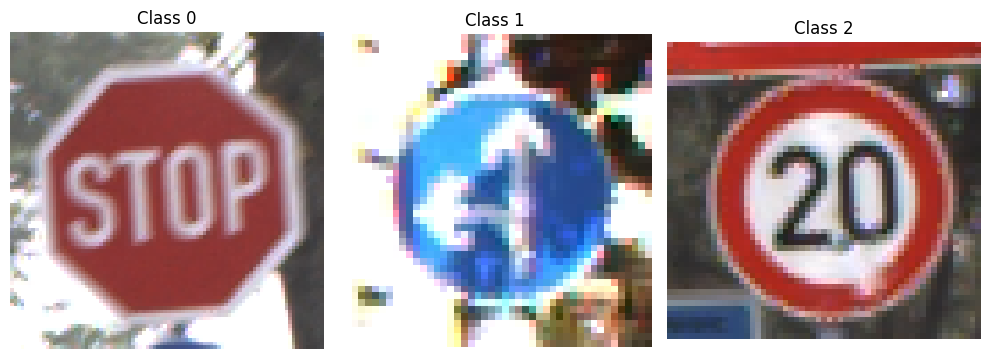

In [14]:
import matplotlib.pyplot as plt
import os
from PIL import Image

gtsrb_small_path = os.path.join('extracted_images', 'gtsrb-small')

class_directories = [d for d in os.listdir(gtsrb_small_path) if os.path.isdir(os.path.join(gtsrb_small_path, d))]
class_directories.sort()

selected_classes = class_directories[:3]

selected_images = []
for class_dir in selected_classes:
    class_path = os.path.join(gtsrb_small_path, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.endswith('.ppm')]
    if image_files:
        selected_images.append((os.path.join(class_path, image_files[0]), class_dir))

num_images = len(selected_images)
fig, axes = plt.subplots(1, num_images, figsize=(10, 5))


for i, (image_path, label) in enumerate(selected_images):
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].set_title(f"Class {label}")
    axes[i].axis('off')


plt.tight_layout()
plt.show()

## Load and preprocess the data

### Subtask:
Visualize the distribution of classes in the dataset.


**Reasoning**:
Count the number of images in each class directory and create a bar chart to visualize the class distribution.



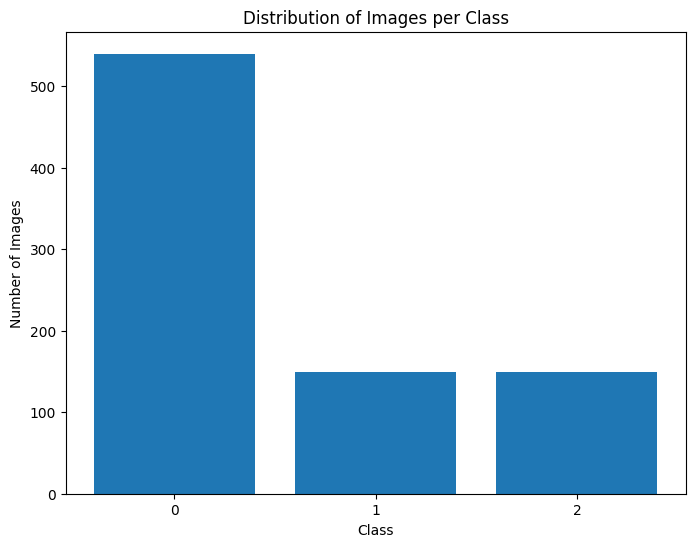

In [15]:
import os
import matplotlib.pyplot as plt

gtsrb_small_path = os.path.join('extracted_images', 'gtsrb-small')

class_counts = {}
for class_dir in os.listdir(gtsrb_small_path):
    class_path = os.path.join(gtsrb_small_path, class_dir)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.endswith('.ppm')]
        class_counts[class_dir] = len(image_files)

sorted_classes = sorted(class_counts.keys())
counts = [class_counts[cls] for cls in sorted_classes]

plt.figure(figsize=(8, 6))
plt.bar(sorted_classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.show()

## Train the cnn model

### Subtask:
Visualize the training history (loss and accuracy curves).


**Reasoning**:
Extract the training and validation accuracy and loss from the history object and plot them.



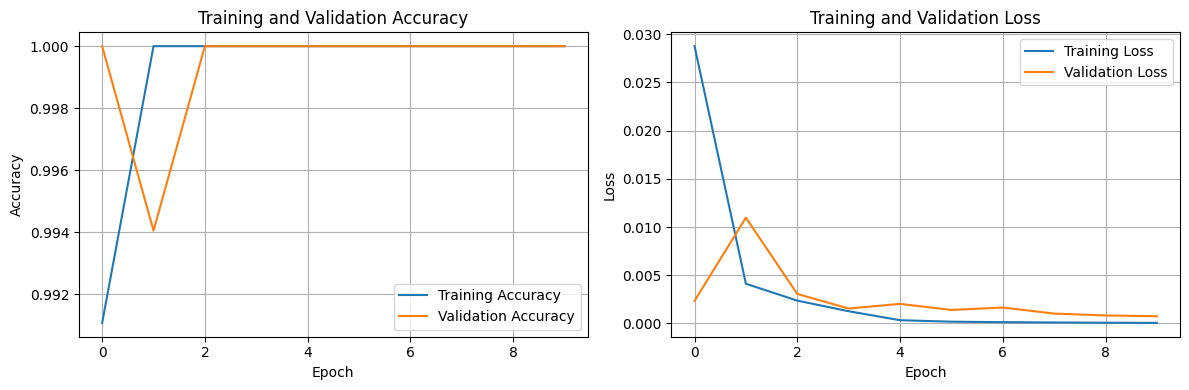

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Generate adversarial noise

### Subtask:
Visualize examples of original and adversarial images.


**Reasoning**:
Select sample images and their adversarial counterparts, then display them side-by-side with titles indicating their type and true class.



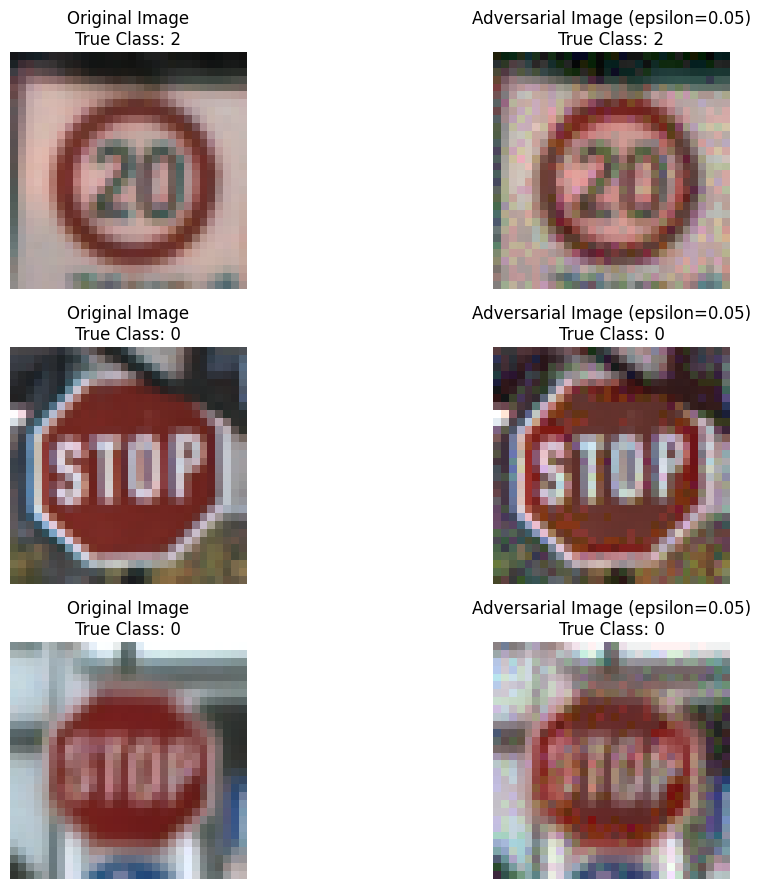

In [17]:
import matplotlib.pyplot as plt
import numpy as np


sample_indices = [0, 5, 10]

plt.figure(figsize=(12, len(sample_indices) * 3))


true_labels_indices = np.argmax(y_test[sample_indices], axis=1)

for i, idx in enumerate(sample_indices):
    original_image = X_test[idx]
    adversarial_image = adversarial_images_np[idx]
    true_label = true_labels_indices[i]


    plt.subplot(len(sample_indices), 2, 2 * i + 1)
    plt.imshow(original_image)
    plt.title(f"Original Image\nTrue Class: {true_label}")
    plt.axis('off')

    plt.subplot(len(sample_indices), 2, 2 * i + 2)
    plt.imshow(adversarial_image)
    plt.title(f"Adversarial Image (epsilon={epsilon:.2f})\nTrue Class: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset is organized into subdirectories representing different road sign classes.
*   The `gtsrb-small` subset contains three classes ('0', '1', '2').
*   The distribution of images across these classes is uneven, indicating class imbalance.
*   During training, the model's training accuracy increased and training loss decreased consistently over epochs.
*   The validation accuracy generally followed the training accuracy, but with some fluctuations, and the validation loss also decreased, suggesting the model learned to generalize to unseen data.
*   Adversarial noise was successfully generated and applied to test images.
*   Visual inspection of sample images showed that the adversarial noise, while present, was subtle and did not drastically alter the visual appearance of the road signs to a human observer.

### Insights or Next Steps

*   The class imbalance in the dataset could potentially affect model performance, especially on underrepresented classes. Techniques like data augmentation or weighted loss functions could be explored to mitigate this.
*   Evaluating the model's performance (accuracy and loss) on adversarial examples is a crucial next step to quantify its robustness against this type of perturbation.
